### Завдання 1. На основі файлу **banking.csv**:
* Сформуйте тестовий тренувальний датасет (розмір тестової частини 0.3)

In [154]:
import pandas as pd

df = pd.read_csv('banking.csv')
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


#### Analysing dataset.

In [155]:
# the first five rows of the loaded data.
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [156]:
# Checking for missing values in dataset.
df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [157]:
# List of all columns.
print(list(df.columns), end='')


['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']

In [158]:
# Remove columns which not important for our main goal.
df.drop(df.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)
print('Dataset is important for our data analysis:')
df.head()


Dataset is important for our data analysis:


,job,marital,default,housing,loan,poutcome,y
0,blue-collar,married,unknown,yes,no,nonexistent,0
1,technician,married,no,no,no,nonexistent,0
2,management,single,no,yes,no,success,1
3,services,married,no,no,no,nonexistent,0
4,retired,married,no,yes,no,success,1


In [159]:
# Data encoding for further analysis.
# Transformation of categorical variables into fictitious ones.
data = pd.get_dummies(df, columns=['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
data


,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
41184,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
41185,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
41186,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [160]:
# For each possible value has been created a new column in the dataset.
data.columns


Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [161]:
data


,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
41184,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
41185,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
41186,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [162]:
# List of unknown columns.
print('Unknown columns:')
data.columns[[12, 16, 18, 21, 24]]


Unknown columns:


Index(['job_unknown', 'marital_unknown', 'default_unknown', 'housing_unknown',
       'loan_unknown'],
      dtype='object')

In [163]:
# Unknown column should be dropped.
data.drop(data.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)


#### Final dataset which will be used for creating models.

In [164]:
print('All columns which will be used for further analysis')
data.columns


All columns which will be used for further analysis


Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

### Завдання 2.
* Застосуйте логістичну регресію для прогнозування цільової метрики (ймовірність того, що клієнт відкриє вклад у банку).

In [165]:
from sklearn.model_selection import train_test_split


# Creating arrays.
X = data.iloc[:, 1:]
y = data.iloc[:,0]

# Splitting into the training set and the testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Training and Testing datasets have been created.')


Training and Testing datasets have been created.


In [166]:
from sklearn.linear_model import LogisticRegression


#  Creating Logistic regression.
log_regression = LogisticRegression().fit(X_train, y_train)
LogisticRegression()


LogisticRegression()

In [167]:
# Prediction values.
y_pred = log_regression.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [168]:
print('Indexes of all probable candidates:\n')
for X in range(len(y_pred)):
   if (y_pred[X] == 1):
      print(X, end=', ')



Indexes of all probable candidates:

12, 35, 41, 67, 94, 103, 117, 198, 203, 264, 275, 452, 566, 568, 601, 624, 656, 718, 727, 736, 748, 767, 800, 807, 818, 825, 854, 861, 883, 906, 919, 938, 990, 1045, 1064, 1097, 1180, 1234, 1247, 1268, 1277, 1288, 1331, 1344, 1371, 1372, 1401, 1428, 1437, 1468, 1479, 1513, 1557, 1564, 1595, 1602, 1610, 1611, 1628, 1671, 1699, 1718, 1723, 1735, 1758, 1765, 1783, 1809, 1849, 1873, 1891, 1921, 1955, 2026, 2048, 2073, 2078, 2120, 2262, 2274, 2309, 2315, 2352, 2383, 2451, 2474, 2480, 2485, 2529, 2564, 2587, 2601, 2615, 2643, 2664, 2693, 2724, 2739, 2740, 2788, 2834, 2849, 2874, 2916, 2928, 2994, 2996, 3031, 3053, 3066, 3085, 3102, 3118, 3122, 3143, 3173, 3193, 3200, 3234, 3244, 3312, 3350, 3363, 3384, 3410, 3452, 3463, 3525, 3572, 3599, 3626, 3634, 3655, 3658, 3661, 3787, 3791, 3883, 3945, 4041, 4085, 4088, 4102, 4111, 4141, 4174, 4180, 4202, 4204, 4217, 4301, 4412, 4416, 4417, 4428, 4521, 4537, 4559, 4568, 4596, 4651, 4744, 4777, 4796, 4861, 4972, 5033,

In [169]:
# Verifying accuracy.
print('Accuracy of the Model: {:.2f}'.format(log_regression.score(X_test, y_test)))


Accuracy of the Model: 0.90


### Завдання 3.
* Оцініть модель за допомогою матриці похибок, метрик **precision, recall, F1-score**. Побудуйте AUC-ROC криву для моделі.

#### Confusion matrix:

In [170]:
from sklearn import metrics


# 1. Confusion matrix.
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[10850,   131],
       [ 1104,   272]], dtype=int64)

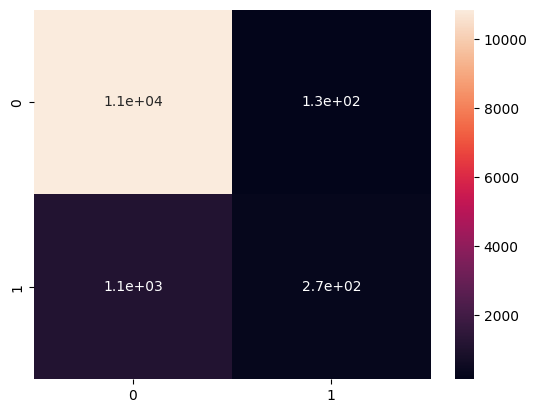

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualisation Confusion matrix.
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True)
plt.show()


#### Precision metric:

In [172]:

pres_metric = metrics.precision_score(y_test, y_pred)
print('Precision metric: {:.2f}'.format(pres_metric))


Precision metric: 0.67


#### Recall metric:

In [173]:
rec_metric = metrics.recall_score(y_test, y_pred)
print('Recall metric: {:.2f}'.format(rec_metric))


Recall metric: 0.20


#### F1-score model:

In [174]:
from sklearn import metrics


f_1 = metrics.f1_score(y_test, y_pred, average=None)
print('F1-score model:', f_1)


F1-score model: [0.94615217 0.30578977]


#### Creating AUC-ROC model:

In [175]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve (y_test, y_pred_proba)
auc = metrics.roc_auc_score (y_test, y_pred_proba)

print('AUC-ROC model has been created!')


AUC-ROC model has been created!


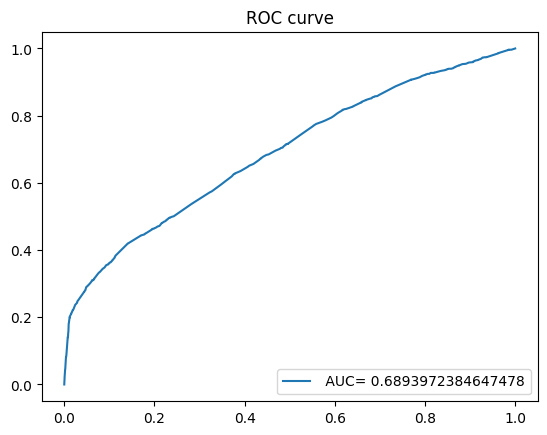

In [177]:
import matplotlib.pyplot as plt

# Visualisation AUC-ROC model.
plt.plot(fpr, tpr, label=' AUC= ' + str(auc))
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()
